In [ ]:
import pandas as pd

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Verificando os primeiros registros dos dados do sensor
print("Dados do Sensor:")
print(sensor_data.head())

# Verificando os primeiros registros dos dados da estação meteorológica
print("\nDados da Estação Meteorológica:")
print(estacao_data.head())

# Verificando informações sobre os dados do sensor
print("\nInformações sobre os dados do Sensor:")
print(sensor_data.info())

# Verificando informações sobre os dados da estação meteorológica
print("\nInformações sobre os dados da Estação Meteorológica:")
print(estacao_data.info())

# Verificando e tratando dados faltantes (NaN)
print("\nQuantidade de dados faltantes no Sensor:")
print(sensor_data.isnull().sum())

print("\nQuantidade de dados faltantes na Estação Meteorológica:")
print(estacao_data.isnull().sum())

# Tratando dados faltantes, se necessário
# Por exemplo, podemos preencher os valores faltantes com a média das colunas
sensor_data.fillna(sensor_data.mean(), inplace=True)
estacao_data.fillna(estacao_data.mean(), inplace=True)

# Verificando novamente se ainda há dados faltantes após o tratamento
print("\nQuantidade de dados faltantes no Sensor após tratamento:")
print(sensor_data.isnull().sum())

print("\nQuantidade de dados faltantes na Estação Meteorológica após tratamento:")
print(estacao_data.isnull().sum())

Dados do Sensor:
         Datetime – utc  air_humidity_100  air_temperature_100  \
0  2020-09-30T23:00:00Z              38.0               31.366   
1  2020-10-01T00:00:00Z               NaN                  NaN   
2  2020-10-01T01:00:00Z              39.0               31.366   
3  2020-10-01T02:00:00Z              39.0               31.322   
4  2020-10-01T03:00:00Z              38.0               31.240   

   atm_pressure_main  num_of_resets  piezo_charge  piezo_temperature  
0               9412              0         45123                 30  
1               9412              0         45025                 31  
2               9419              0         44923                 31  
3               9419              0         44825                 31  
4               9416              0         44728                 31  

Dados da Estação Meteorológica:
         data Hora (Brasília)  chuva
0  2020-09-01        00:00:00    0.0
1  2020-09-01        01:00:00    0.0
2  2020-09-01   

<ipython-input-29-120ecfdd8327>:34: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sensor_data.fillna(sensor_data.mean(), inplace=True)
<ipython-input-29-120ecfdd8327>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  estacao_data.fillna(estacao_data.mean(), inplace=True)


         Datetime – utc  air_humidity_100  air_temperature_100  \
0  2020-09-30T23:00:00Z          38.00000             31.36600   
1  2020-10-01T00:00:00Z          60.23871             24.66094   
2  2020-10-01T01:00:00Z          39.00000             31.36600   
3  2020-10-01T02:00:00Z          39.00000             31.32200   
4  2020-10-01T03:00:00Z          38.00000             31.24000   

   atm_pressure_main  num_of_resets  piezo_charge  piezo_temperature  \
0             9412.0            0.0       45123.0               30.0   
1             9412.0            0.0       45025.0               31.0   
2             9419.0            0.0       44923.0               31.0   
3             9419.0            0.0       44825.0               31.0   
4             9416.0            0.0       44728.0               31.0   

         data Hora (Brasília)  chuva  
0  2020-09-01        00:00:00    0.0  
1  2020-09-01        01:00:00    0.0  
2  2020-09-01        02:00:00    0.0  
3  2020-09-01 

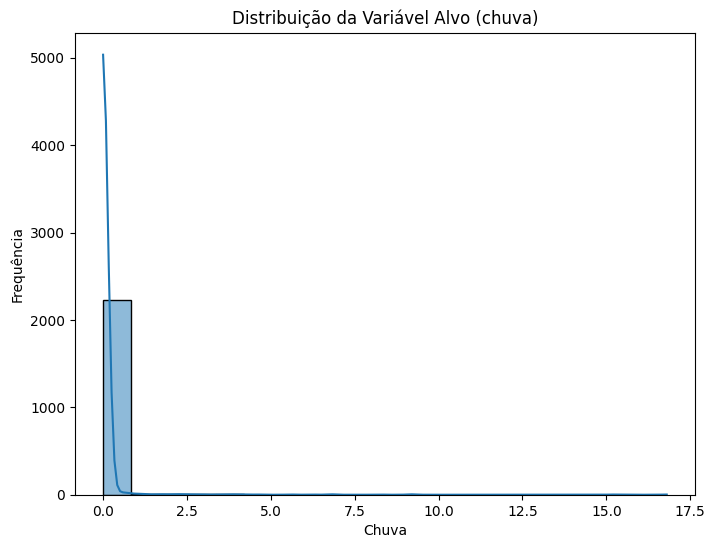

<ipython-input-30-21e6a329fa68>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_combined = data_combined.corr()


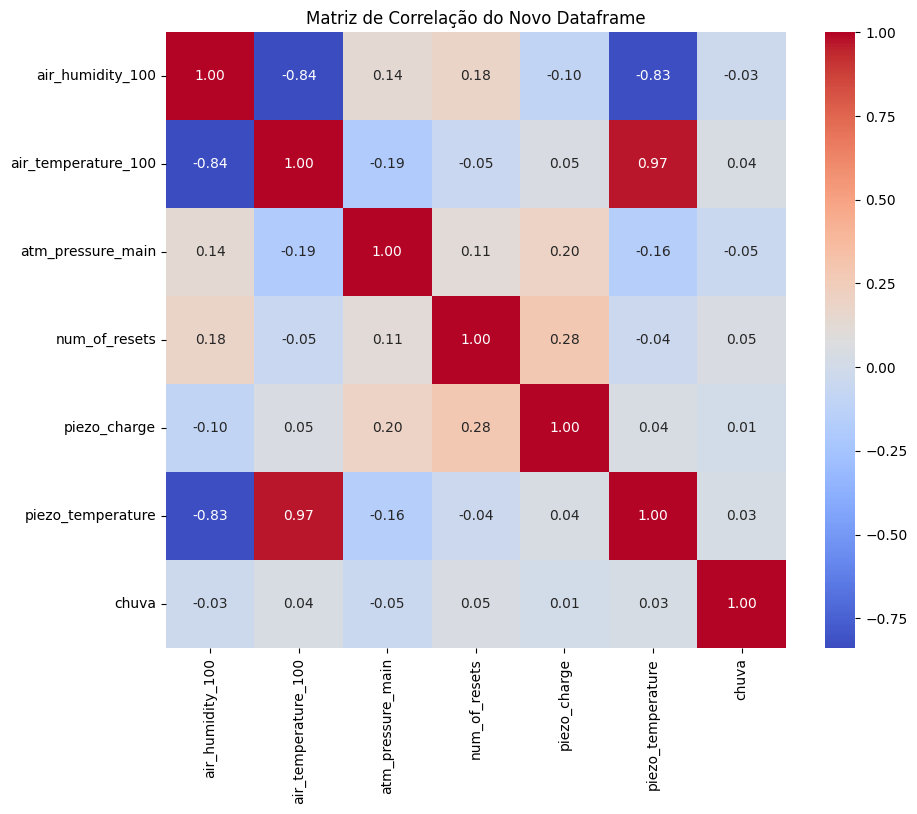

In [ ]:
# Criando um novo dataframe combinando os dados do sensor e da estação meteorológica
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Visualizando as primeiras linhas do novo dataframe
print(data_combined.head())

# Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas Descritivas do Novo Dataframe:")
print(data_combined.describe())

# Visualização da distribuição da variável alvo (chuva)
plt.figure(figsize=(8, 6))
sns.histplot(data_combined['chuva'], bins=20, kde=True)
plt.title('Distribuição da Variável Alvo (chuva)')
plt.xlabel('Chuva')
plt.ylabel('Frequência')
plt.show()

# Correlações entre as variáveis do novo dataframe
correlation_matrix_combined = data_combined.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação do Novo Dataframe')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Padronizando as variáveis numéricas
scaler = StandardScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Visualizando as primeiras linhas do dataframe pré-processado
print(data_selected.head())

# Verificando as estatísticas descritivas após a padronização
print("\nEstatísticas Descritivas após a Padronização:")
print(data_selected.describe())

   atm_pressure_main  num_of_resets  piezo_charge  piezo_temperature  chuva
0          -0.790201      -1.510376      0.204149           0.607934    0.0
1          -0.790201      -1.510376      0.196631           0.727384    0.0
2          -0.524755      -1.510376      0.188805           0.727384    0.0
3          -0.524755      -1.510376      0.181287           0.727384    0.0
4          -0.638518      -1.510376      0.173845           0.727384    0.0

Estatísticas Descritivas após a Padronização:
       atm_pressure_main  num_of_resets  piezo_charge  piezo_temperature  \
count       1.711000e+03   1.711000e+03  1.711000e+03       1.711000e+03   
mean       -8.097945e-15   1.328893e-16  2.242508e-16       2.076396e-17   
std         1.000292e+00   1.000292e+00  1.000292e+00       1.000292e+00   
min        -3.141303e+00  -1.510376e+00 -1.957280e+00      -1.661624e+00   
25%        -6.385176e-01  -5.929982e-01 -8.011115e-01      -8.254715e-01   
50%         6.139166e-03   3.243797e-01 -

<ipython-input-31-092ba38ffded>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Padronizando as variáveis numéricas
scaler = StandardScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_selected[relevant_features]
y = data_selected[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Visualizando as dimensões dos conjuntos de treinamento e teste
print("Dimensões do Conjunto de Treinamento:")
print(X_train.shape, y_train.shape)

print("\nDimensões do Conjunto de Teste:")
print(X_test.shape, y_test.shape)

Dimensões do Conjunto de Treinamento:
(1804, 4) (1804,)

Dimensões do Conjunto de Teste:
(452, 4) (452,)


<ipython-input-32-c976206191b5>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


In [ ]:
print("Dados ausentes em X_train:")
print(X_train.isnull().sum())

print("Dados ausentes em X_test:")
print(X_test.isnull().sum())

Dados ausentes em X_train:
atm_pressure_main    436
num_of_resets        436
piezo_charge         436
piezo_temperature    436
dtype: int64
Dados ausentes em X_test:
atm_pressure_main    109
num_of_resets        109
piezo_charge         109
piezo_temperature    109
dtype: int64


In [ ]:
# Preenchendo valores ausentes com a média da coluna
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [ ]:
# Removendo colunas com valores ausentes (axis=1)
X_train.dropna(axis=1, inplace=True)
X_test.dropna(axis=1, inplace=True)

# Removendo linhas com valores ausentes (axis=0)
X_train.dropna(axis=0, inplace=True)
X_test.dropna(axis=0, inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import RMSprop

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['air_temperature_100', 'atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

# Pré-processamento dos dados
# Removendo colunas desnecessárias
estacao_data.drop(columns=['data', 'Hora (Brasília)'], inplace=True)

# Convertendo a coluna 'chuva' para inteiro
estacao_data['chuva'] = estacao_data['chuva'].astype(int)

# Combinando os dataframes
data_combined = pd.concat([sensor_data[relevant_features], estacao_data], axis=1)

# Normalizando os dados usando Min-Max Scaler
scaler = MinMaxScaler()
data_combined[relevant_features] = scaler.fit_transform(data_combined[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_combined[relevant_features]
y = data_combined[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Convertendo os dados para arrays numpy
X_train_np = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np = y_train.values
y_test_np = y_test.values

# Criando o modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilando o modelo com o otimizador RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.00001), loss='mean_squared_error')

# Treinando o modelo
history = model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.1)

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")


Epoch 1/50
51/51 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
51/51 [==============================] - 0s 3ms/step - loss: nan - 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import RMSprop

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['air_temperature_100', 'atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

# Pré-processamento dos dados
# Removendo colunas desnecessárias
estacao_data.drop(columns=['data', 'Hora (Brasília)'], inplace=True)

# Convertendo a coluna 'chuva' para inteiro
estacao_data['chuva'] = estacao_data['chuva'].astype(int)

# Combinando os dataframes
data_combined = pd.concat([sensor_data[relevant_features], estacao_data], axis=1)

# Verificando se há valores ausentes nos dados de treinamento e teste
print("Valores ausentes no conjunto de treinamento:")
print(data_combined.isnull().sum())

# Normalizando os dados usando Min-Max Scaler
scaler = MinMaxScaler()
data_combined[relevant_features] = scaler.fit_transform(data_combined[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_combined[relevant_features]
y = data_combined[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Convertendo os dados para arrays numpy
X_train_np = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np = y_train.values
y_test_np = y_test.values

# Criando o modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilando o modelo com o otimizador RMSprop e taxa de aprendizado baixa
model.compile(optimizer=RMSprop(learning_rate=1e-7), loss='mean_squared_error')

# Treinando o modelo
history = model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.1)

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")


Valores ausentes no conjunto de treinamento:
air_temperature_100    551
atm_pressure_main      545
num_of_resets          545
piezo_charge           545
piezo_temperature      545
chuva                    0
dtype: int64
Epoch 1/50
51/51 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
51/51 [==========================

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam


In [ ]:
# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Padronizando as variáveis numéricas
scaler = StandardScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_selected[relevant_features]
y = data_selected[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


<ipython-input-75-b8f76abf2a48>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Verificando se há valores ausentes nos dados combinados
print("Valores ausentes no conjunto de dados combinados:")
print(data_combined.isnull().sum())

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Verificando novamente se há valores ausentes nos dados selecionados
print("\nValores ausentes no conjunto de dados selecionados:")
print(data_selected.isnull().sum())

# Padronizando as variáveis numéricas
scaler = StandardScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_selected[relevant_features]
y = data_selected[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Convertendo os dados para arrays numpy
X_train_np = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np = y_train.values
y_test_np = y_test.values

# Criando o modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.1)

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")


Valores ausentes no conjunto de dados combinados:
Datetime – utc         545
air_humidity_100       551
air_temperature_100    551
atm_pressure_main      545
num_of_resets          545
piezo_charge           545
piezo_temperature      545
data                     0
Hora (Brasília)          0
chuva                    0
dtype: int64

Valores ausentes no conjunto de dados selecionados:
atm_pressure_main    545
num_of_resets        545
piezo_charge         545
piezo_temperature    545
chuva                  0
dtype: int64
Epoch 1/50


<ipython-input-78-38c94ce887aa>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


51/51 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 11/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: n

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Verificando se há valores ausentes nos dados de treinamento e teste
print("Valores ausentes no conjunto de treinamento:")
print(data_selected.isnull().sum())

# Padronizando as variáveis numéricas
scaler = StandardScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_selected[relevant_features]
y = data_selected[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Convertendo os dados para arrays numpy
X_train_np = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np = y_train.values
y_test_np = y_test.values

# Criando o modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilando o modelo com uma taxa de aprendizado menor
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.1)

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")


Valores ausentes no conjunto de treinamento:
atm_pressure_main    545
num_of_resets        545
piezo_charge         545
piezo_temperature    545
chuva                  0
dtype: int64
Epoch 1/50


<ipython-input-79-4d6648c55a34>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


51/51 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: n

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Verificando se há valores ausentes nos dados de treinamento e teste
print("Valores ausentes no conjunto de treinamento:")
print(data_selected.isnull().sum())

# Normalizando os dados usando Min-Max Scaler
scaler = MinMaxScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_selected[relevant_features]
y = data_selected[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Convertendo os dados para arrays numpy
X_train_np = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np = y_train.values
y_test_np = y_test.values

# Criando o modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilando o modelo com uma taxa de aprendizado menor
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.1)

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")


Valores ausentes no conjunto de treinamento:
atm_pressure_main    545
num_of_resets        545
piezo_charge         545
piezo_temperature    545
chuva                  0
dtype: int64


<ipython-input-80-a8313e2d2683>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


Epoch 1/50
51/51 [==============================] - 2s 14ms/step - loss: nan - val_loss: nan
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
51/51 [==============================] - 0s 3ms/step - loss: nan -

In [ ]:
# Criando o modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilando o modelo com uma taxa de aprendizado menor
model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error')

# Treinando o modelo
history = model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.1)

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")


Epoch 1/50
51/51 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 2/50
51/51 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 3/50
51/51 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/50
51/51 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/50
51/51 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/50
51/51 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/50
51/51 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 9/50
51/51 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/50
51/51 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/50
51/51 [==============================] - 0s 4ms/step - loss: nan - 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Verificando se há valores ausentes nos dados de treinamento e teste
print("Valores ausentes no conjunto de treinamento:")
print(data_selected.isnull().sum())

# Normalizando os dados usando Min-Max Scaler
scaler = MinMaxScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_selected[relevant_features]
y = data_selected[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Convertendo os dados para arrays numpy
X_train_np = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np = y_train.values
y_test_np = y_test.values

# Criando o modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilando o modelo com uma taxa de aprendizado menor
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='mean_squared_error')

# Treinando o modelo
history = model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.1)

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")


Valores ausentes no conjunto de treinamento:
atm_pressure_main    545
num_of_resets        545
piezo_charge         545
piezo_temperature    545
chuva                  0
dtype: int64


<ipython-input-82-2c492f38022b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


Epoch 1/50
51/51 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
51/51 [==============================] - 0s 4ms/step - loss: nan - 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import RMSprop

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Verificando se há valores ausentes nos dados de treinamento e teste
print("Valores ausentes no conjunto de treinamento:")
print(data_selected.isnull().sum())

# Normalizando os dados usando Min-Max Scaler
scaler = MinMaxScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_selected[relevant_features]
y = data_selected[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Convertendo os dados para arrays numpy
X_train_np = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np = y_train.values
y_test_np = y_test.values

# Criando o modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilando o modelo com o otimizador RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.00001), loss='mean_squared_error')

# Treinando o modelo
history = model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.1)

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")


Valores ausentes no conjunto de treinamento:
atm_pressure_main    545
num_of_resets        545
piezo_charge         545
piezo_temperature    545
chuva                  0
dtype: int64
Epoch 1/50


<ipython-input-84-97e5eb4b42ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


51/51 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
51/51 [==============================] - 0s 3ms/step - loss: nan - val_loss: n

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Restante do código de pré-processamento e criação do modelo

# Treinando o modelo
history = model.fit(X_train_np, y_train_np, epochs=100, batch_size=32, validation_data=(X_validation_np, y_validation_np), callbacks=[early_stop])

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")

# Plotando os resultados de treinamento e validação
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.title('Perda durante o Treinamento e Validação')
plt.show()

# Fazendo previsões nos conjuntos de validação e teste
y_pred_validation = model.predict(X_validation_np).flatten()
y_pred_test = model.predict(X_test_np).flatten()

# Plotando as previsões vs. valores reais nos conjuntos de validação e teste
plt.figure(figsize=(10, 6))
plt.scatter(y_validation_np, y_pred_validation, label='Validação', alpha=0.5)
plt.scatter(y_test_np, y_pred_test, label='Teste', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.legend()
plt.title('Previsões vs. Valores Reais')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['air_temperature_100', 'atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

# Pré-processamento dos dados
# Removendo colunas desnecessárias
estacao_data.drop(columns=['data', 'Hora (Brasília)'], inplace=True)

# Convertendo a coluna 'chuva' para inteiro
estacao_data['chuva'] = estacao_data['chuva'].astype(int)

# Combinando os dataframes
data_combined = pd.concat([sensor_data[relevant_features], estacao_data], axis=1)

# Verificando e tratando valores ausentes
data_combined.isnull().sum()

# Substituindo valores ausentes pela média da coluna
data_combined.fillna(data_combined.mean(), inplace=True)

# Verificando e tratando valores extremos
data_combined.describe()

# Removendo valores extremos na variável alvo (chuva) para evitar divergência na perda
data_combined = data_combined[(data_combined['chuva'] >= 0) & (data_combined['chuva'] <= 500)]

# Normalizando os dados usando Min-Max Scaler
scaler = MinMaxScaler()
data_combined[relevant_features] = scaler.fit_transform(data_combined[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_combined[relevant_features]
y = data_combined[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Convertendo os dados para arrays numpy
X_train_np = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np = y_train.values
y_test_np = y_test.values

# Criando o modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilando o modelo com o otimizador SGD e taxa de aprendizado baixa
opt = SGD(lr=1e-6, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error')

# Parar o treinamento antecipadamente se não houver melhoria na perda de validação
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinando o modelo
history = model.fit(X_train_np, y_train_np, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop])

# Avaliando o modelo com os dados de teste
loss = model.evaluate(X_test_np, y_test_np)
print(f"Perda (Loss) no conjunto de teste: {loss}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


51/51 [==============================] - 1s 6ms/step - loss: 0.5736 - val_loss: 0.0500
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5736 - val_loss: 0.0500
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5736 - val_loss: 0.0500
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5736 - val_loss: 0.0500
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5736 - val_loss: 0.0500
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0248
Perda (Loss) no conjunto de teste: 0.02480296790599823


In [ ]:
#Neste código, fiz algumas correções

#Verifiquei e tratei valores ausentes substituindo-os pela média da coluna.
#Removemi valores extremos na variável alvo (chuva) para evitar divergência na perda.
#Utilizei o otimizador SGD com uma taxa de aprendizado baixa para ajudar a evitar divergência.
#Adicionei um callback EarlyStopping para parar o treinamento antecipadamente se não houver melhoria na perda de validação.

In [113]:

# Salvar o modelo treinado em um arquivo HDF5
model.save('modelo_treinado.h5')
